In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [13]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df1 = df.drop(columns=["RowNumber","CustomerId","Surname"])

In [16]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df1.shape

(10000, 11)

In [18]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [19]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [20]:
df1.duplicated().sum()

0

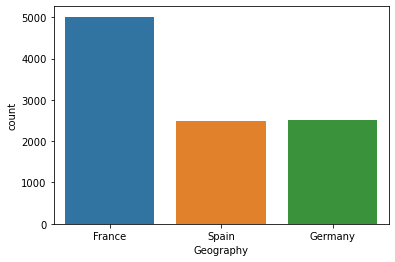

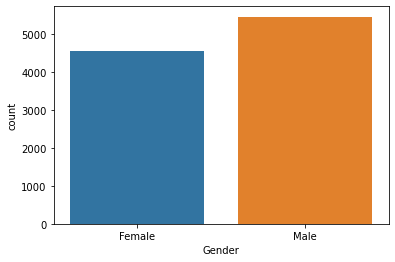

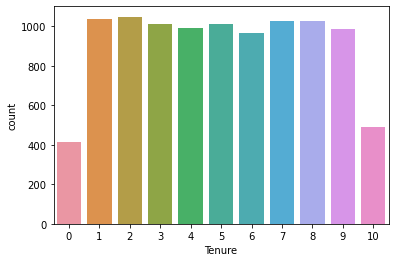

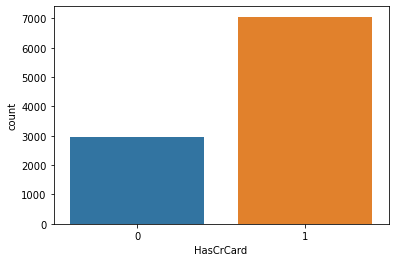

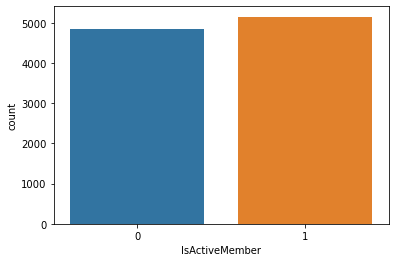

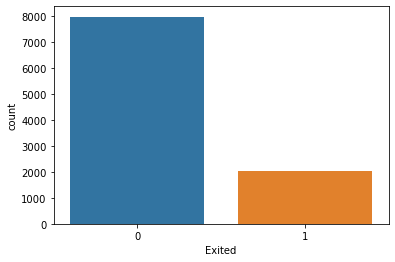

In [21]:
for i in ["Geography","Gender","Tenure","HasCrCard","IsActiveMember","Exited"]:
    sns.countplot(x=i, data=df1)
    plt.show()

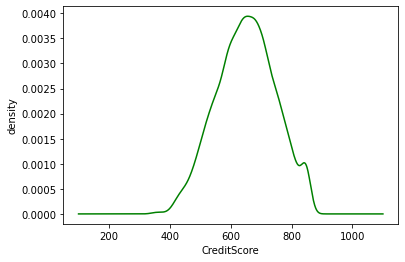

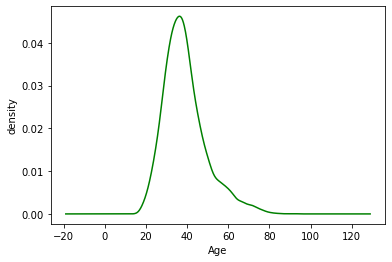

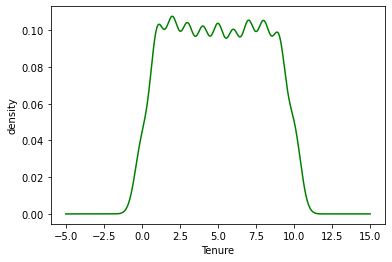

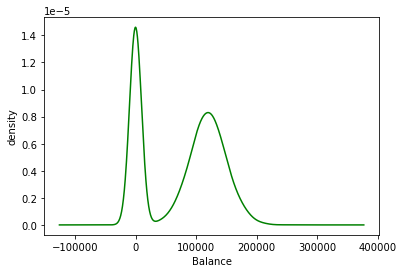

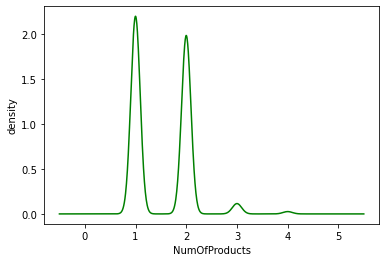

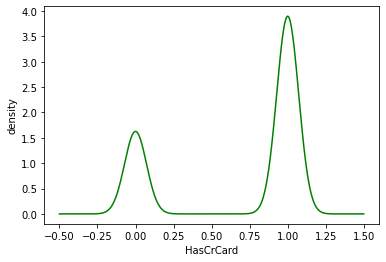

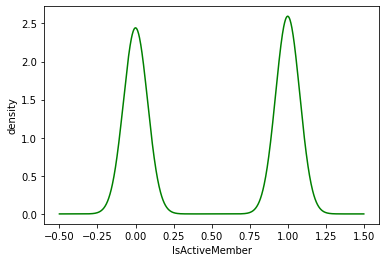

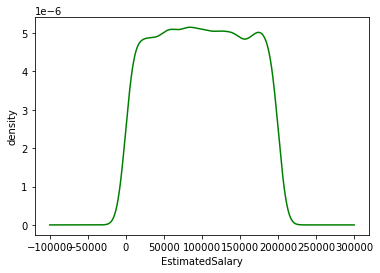

In [22]:
for i in ["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]:
    df1[i].plot.kde(color="green")
    plt.xlabel(i)
    plt.ylabel("density")
    plt.show()

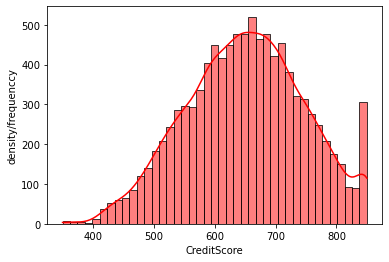

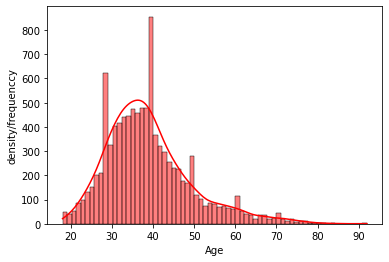

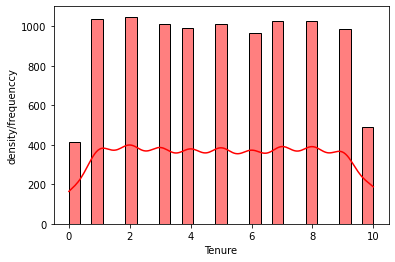

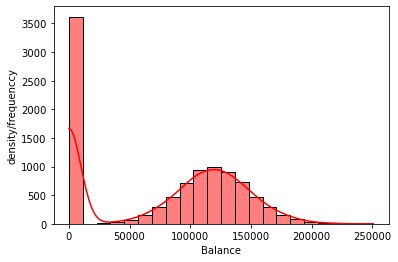

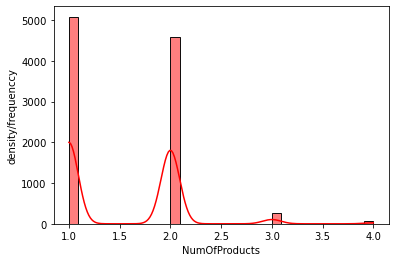

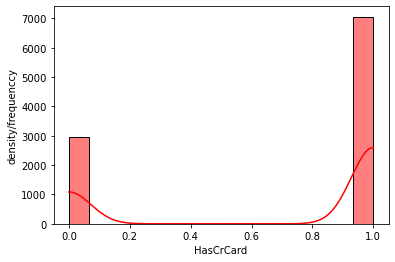

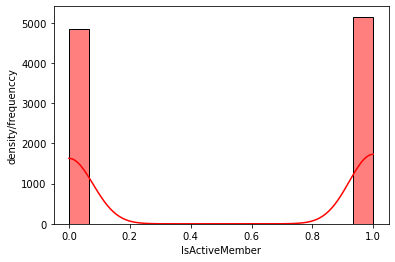

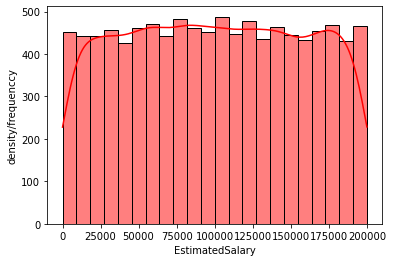

In [23]:
for i in ["CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]:
    sns.histplot(df1[i], kde=True, color="red")
    plt.xlabel(i)
    plt.ylabel("density/frequenccy")
    plt.show()

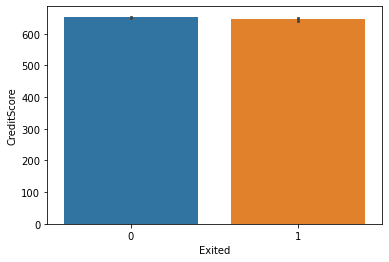

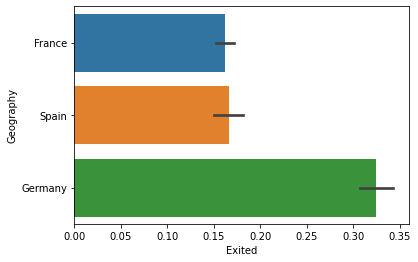

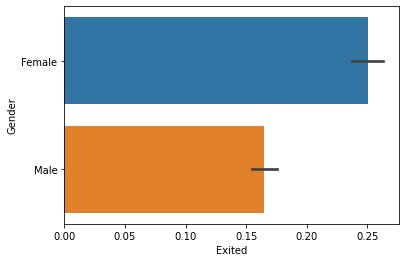

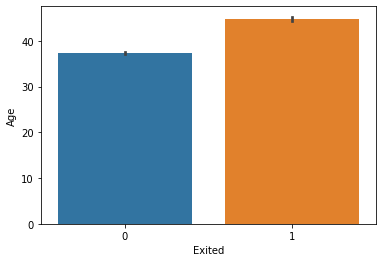

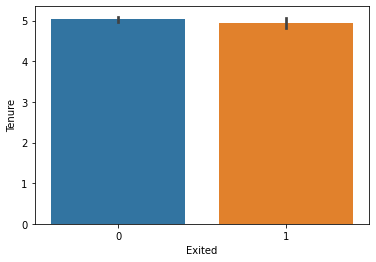

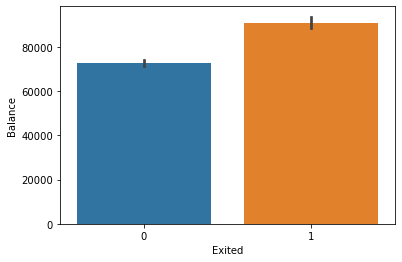

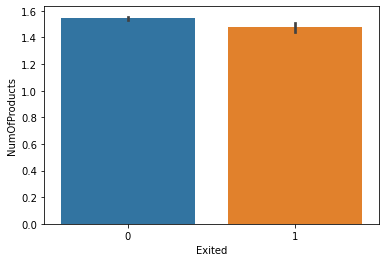

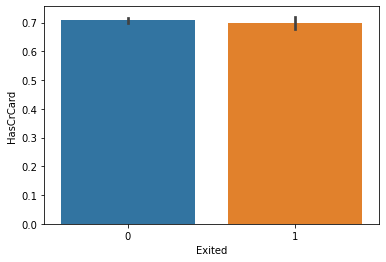

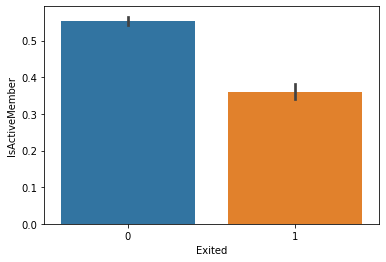

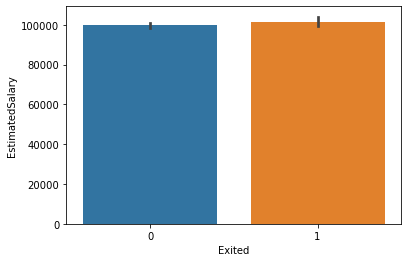

In [24]:
for i in df1.columns[:-1]:
    sns.barplot(x="Exited", y=i, data=df1)
    plt.xlabel("Exited")
    plt.ylabel(i)
    plt.show()

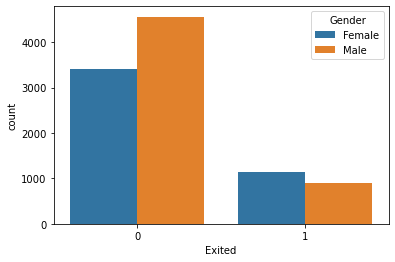

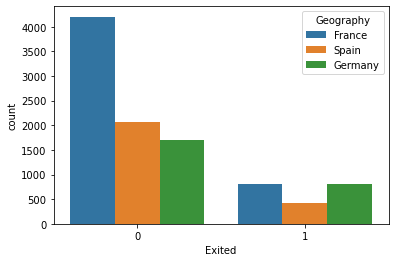

In [25]:
for i in ["Gender","Geography"]:
    sns.countplot(x="Exited", data=df1, hue=i)
    plt.show()

In [26]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
df2 = pd.get_dummies(df1, drop_first=True)

In [29]:
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [30]:
X = df2.drop(columns=["Exited"])
y = df2["Exited"]

In [31]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [32]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(len(X_train.columns),), activation='leaky_relu'),
    keras.layers.Dense(3, activation='leaky_relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=350)

Epoch 1/350
250/250 [==============================] - 1s 3ms/step - loss: 0.6519 - accuracy: 0.6619
Epoch 2/350
250/250 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.7962
Epoch 3/350
250/250 [==============================] - 1s 3ms/step - loss: 0.5045 - accuracy: 0.7961
Epoch 4/350
250/250 [==============================] - 1s 3ms/step - loss: 0.4928 - accuracy: 0.7970: 0s - loss:
Epoch 5/350
250/250 [==============================] - 1s 3ms/step - loss: 0.4845 - accuracy: 0.7994
Epoch 6/350
250/250 [==============================] - 1s 3ms/step - loss: 0.4775 - accuracy: 0.8021
Epoch 7/350
250/250 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.8050
Epoch 8/350
250/250 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8058
Epoch 9/350
250/250 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.8061: 0s - loss: 0.4
Epoch 10/350
250/250 [==============================] - 1s 2ms/

250/250 [==============================] - 1s 3ms/step - loss: 0.3630 - accuracy: 0.8468: 0s - loss: 0.3604 
Epoch 80/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8474
Epoch 81/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8475
Epoch 82/350
250/250 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8474
Epoch 83/350
250/250 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8500
Epoch 84/350
250/250 [==============================] - 0s 2ms/step - loss: 0.3581 - accuracy: 0.8501
Epoch 85/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8494
Epoch 86/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8509: 0s - loss: 0
Epoch 87/350
250/250 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8512
Epoch 88/350
250/250 [==============================] - 0s 1m

Epoch 158/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8620
Epoch 159/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8633
Epoch 160/350
250/250 [==============================] - 0s 939us/step - loss: 0.3410 - accuracy: 0.8620
Epoch 161/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8621
Epoch 162/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8616
Epoch 163/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8612
Epoch 164/350
250/250 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8620
Epoch 165/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8624
Epoch 166/350
250/250 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8625
Epoch 167/350
250/250 [==============================] - 0s 2ms/step - 

250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8633
Epoch 238/350
250/250 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8624
Epoch 239/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8618
Epoch 240/350
250/250 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8620
Epoch 241/350
250/250 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8609
Epoch 242/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3391 - accuracy: 0.8631
Epoch 243/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8605
Epoch 244/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8604
Epoch 245/350
250/250 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8611
Epoch 246/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3388 - a

250/250 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8621
Epoch 317/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8604
Epoch 318/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8633
Epoch 319/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8621
Epoch 320/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8614
Epoch 321/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8621
Epoch 322/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8618
Epoch 323/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8633
Epoch 324/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8625
Epoch 325/350
250/250 [==============================] - 1s 3ms/step - loss: 0.3379 - a

In [38]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 928us/step - loss: 0.3320 - accuracy: 0.8645


[0.3319859504699707, 0.8644999861717224]

In [39]:
model.predict(X_test)

array([[0.24448326],
       [0.35563853],
       [0.19282061],
       ...,
       [0.12200785],
       [0.12726235],
       [0.18414077]], dtype=float32)

In [40]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [42]:
coef, intercept = model.get_weights()

ValueError: too many values to unpack (expected 2)